In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import Audio_code as ac

%matplotlib inline

In [2]:
### Parameters ###
fft_size = 2048 # window size for the FFT
step_size = fft_size//16 # distance to slide along the window (in time)
spec_thresh = 4 # threshold for spectrograms (lower filters out more noise)
lowcut = 500 # Hz # Low cut for our butter bandpass filter
highcut = 15000 # Hz # High cut for our butter bandpass filter
# For mels
n_mel_freq_components = 64 # number of mel frequency channels
shorten_factor = 10 # how much should we compress the x-axis (time)
start_freq = 300 # Hz # What frequency to start sampling our melS from 
end_freq = 8000 # Hz # What frequency to stop sampling our melS from 

In [8]:
# Invert from the spectrogram image back to a waveform
audio = ac.invert_pretty_spectrogram(my_image, fft_size = fft_size,
                                            step_size = step_size, log = True, n_iter = 10)
IPython.display.Audio(data=audio, rate=44100) # play the audio as sampled at 44.1 kHz

Text(0.5,1.05,'Recovered Spectrogram')

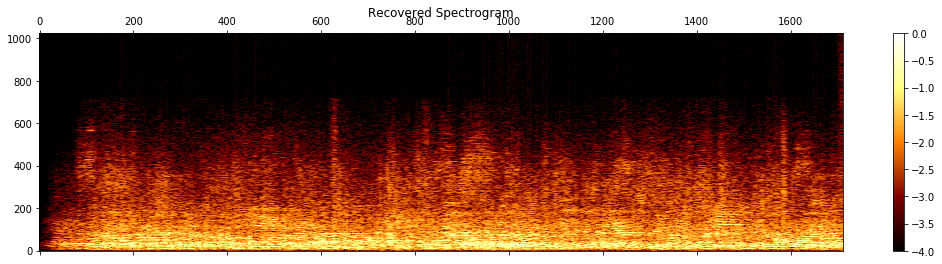

In [9]:
# Make a spectrogram of the inverted audio (for visualization)
spectrogram = ac.pretty_spectrogram(audio.astype('float64'), fft_size = fft_size, 
                                   step_size = step_size, log = True, thresh = spec_thresh)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(18,4))
cax = ax.matshow(np.transpose(spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Spectrogram')